In [2]:
import pandas as pd
df = pd.read_csv('../Database/CBS_10-04-2023.csv')

In [3]:
train = pd.read_csv('cv_models/train_results_2023-11-10.csv')
val = pd.read_csv('cv_models/val_results_2023-11-10.csv')

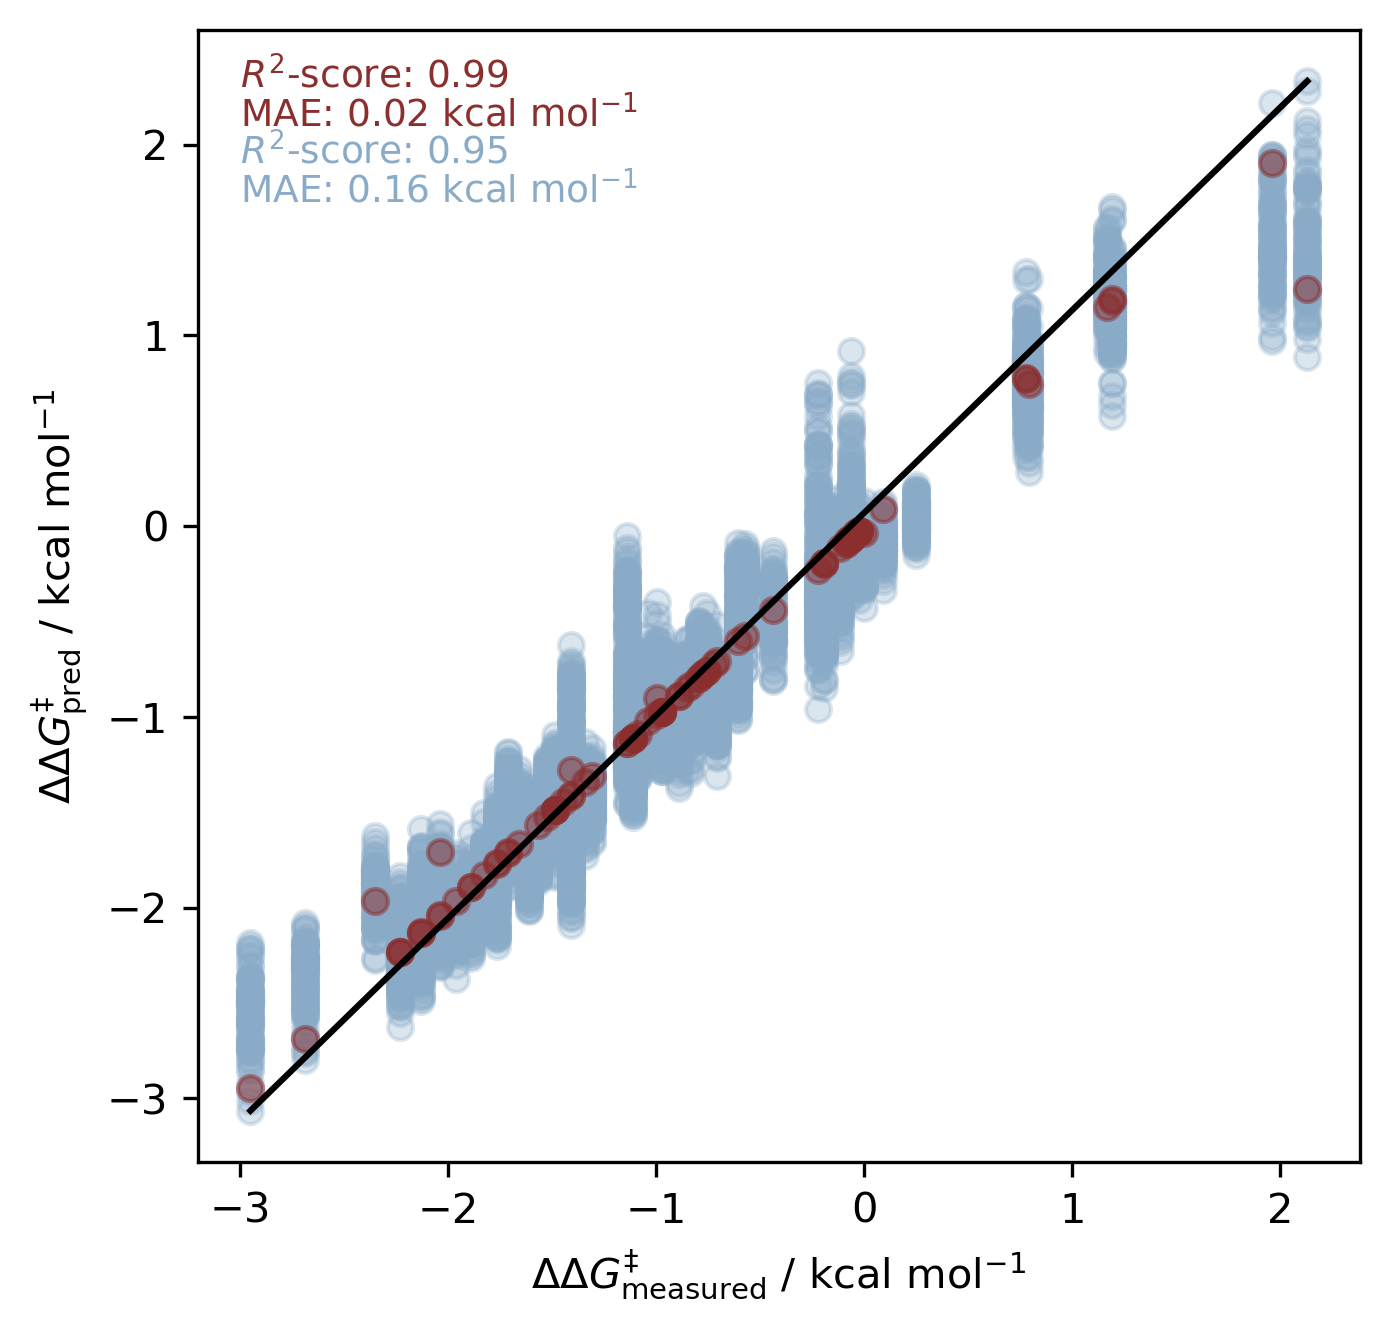

0.10814655866834436


In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

val_color = '#8B2E2E'
train_color = '#89ABC8'

plt.figure(figsize=(5,5), dpi=300)

plt.scatter(train['train_true'], train['train_pred'], label='Train', color=train_color, alpha=0.3)
plt.scatter(val['val_true'], val['val_pred'], label='Val', color=val_color, alpha=0.5)
plt.plot([train['train_true'].min(), train['train_true'].max()], [train['train_pred'].min(), train['train_pred'].max()], color='#000000', alpha=1)
plt.xlabel(r'$\Delta\Delta G^‡_\mathrm{measured}$ / kcal mol$^{-1}$')
plt.ylabel(r'$\Delta\Delta G^‡_\mathrm{pred}$ / kcal mol$^{-1}$')

# add metrics as text in the top left corner
plt.text(-3, 2.3, f'$R^2$-score: {r2_score(val.val_true, val.val_pred):.2f}', fontsize=9, color=val_color)
plt.text(-3, 2.1, f'MAE: {mean_absolute_error(val.val_true, val.val_pred):.2f}' + ' kcal mol$^{-1}$', fontsize=9, color=val_color)
plt.text(-3, 1.9, f'$R^2$-score: {r2_score(train.train_true, train.train_pred):.2f}', fontsize=9, color=train_color)
plt.text(-3, 1.7, f'MAE: {mean_absolute_error(train.train_true, train.train_pred):.2f}' + ' kcal mol$^{-1}$', fontsize=9, color=train_color)
#plt.grid(alpha=0.5)
plt.savefig('cv_models/cv_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print((mean_squared_error(val.val_true, val.val_pred))**0.5)


In [12]:
# Define the existing colors in RGB format
colors = {
    'Green': (0, 143, 0),
    'Purple': (49, 57, 100),
    'Grey': (207, 207, 207),
    'LightBlue': (195, 232, 254),
    'Blue': (137, 171, 200),
    'DarkBlue': (99, 136, 172),
}

# Function to interpolate between two colors
def interpolate_color(color1, color2):
    r = (color1[0] + color2[0]) // 2
    g = (color1[1] + color2[1]) // 2
    b = (color1[2] + color2[2]) // 2
    return (r, g, b)

# Calculate intermediate colors
intermediate_colors = []
intermediate_colors.append(interpolate_color(colors['Green'], colors['Purple']))
intermediate_colors.append(interpolate_color(colors['Purple'], colors['Grey']))
intermediate_colors.append(interpolate_color(colors['Grey'], colors['LightBlue']))
intermediate_colors.append(interpolate_color(colors['LightBlue'], colors['Blue']))
intermediate_colors.append(interpolate_color(colors['Blue'], colors['DarkBlue']))
intermediate_colors.append(interpolate_color(colors['DarkBlue'], colors['Green']))

# Convert the RGB values to Hex format
intermediate_colors_hex = ['#{:02x}{:02x}{:02x}'.format(r, g, b) for r, g, b in intermediate_colors]

# Combine the original and interpolated colors into a single list
all_colors_hex = list(colors.values())
all_colors_hex.extend(intermediate_colors)

# Convert the RGB values to Hex format for the full list
all_colors_hex = ['#{:02x}{:02x}{:02x}'.format(r, g, b) for r, g, b in all_colors_hex]

print(all_colors_hex)


['#008f00', '#313964', '#cfcfcf', '#c3e8fe', '#89abc8', '#6388ac', '#186432', '#808499', '#c9dbe6', '#a6c9e3', '#7699ba', '#318b56']


Chemical Splitting

['O=C(C)C1=CC=CC=C1' 'O=C(C1=CC=CC=C1)C(OC)=O' 'CC(CC)=O' 'O=C(CC)CCC'
 'CC(CCl)=O' 'O=C(C)C(C)C' 'CC(CCC)=O' 'CC(C1CCCCC1)=O' 'CC(C(C)(C)C)=O'
 'O=C(CCCCC)C']
['[H]B1N[C@@H]2C3=CC=CC=C3C[C@@H]2O1'
 '[H][C@]12C(C3=CC=CC=C3)(C4=CC=CC=C4)OBN1CCC2'
 '[H][C@]12C(C3=CC4=C(C=CC=C4)C=C3)(C5=CC6=C(C=CC=C6)C=C5)OBN1CCC2'
 'CC1=CC(C)=CC(C2(C3=CC(C)=CC(C)=C3)[C@@]4([H])N(CCC4)BO2)=C1'
 '[H][C@@]1(N(BO2)CCC1)C2(C3=CC(C(C)(C)C)=CC(C(C)(C)C)=C3)C4=CC(C(C)(C)C)=CC(C(C)(C)C)=C4'
 '[H][C@@]12N(CCC2)BOC1(C3=CC(C(C)C)=CC(C(C)C)=C3)C4=CC(C(C)C)=CC(C(C)C)=C4'
 'CC1=C(OC)C(C)=CC(C(OB2[H])(C3=CC(C)=C(OC)C(C)=C3)[C@H]4N2CCC4)=C1'
 '[H]B1N[C@H]2C3=CC=CC=C3C[C@H]2O1'
 '[H][C@]12C(C3=CC(C4=CC=CC=C4)=CC(C5=CC=CC=C5)=C3)(C6=CC(C7=CC=CC=C7)=CC(C8=CC=CC=C8)=C6)OB([H])N1CCC2'
 '[H][C@]12C(C3=CC(C(C)(C)C)=C(OC)C(C(C)(C)C)=C3)(C4=CC(C(C)(C)C)=C(OC)C(C(C)(C)C)=C4)OB([H])N1CCC2']


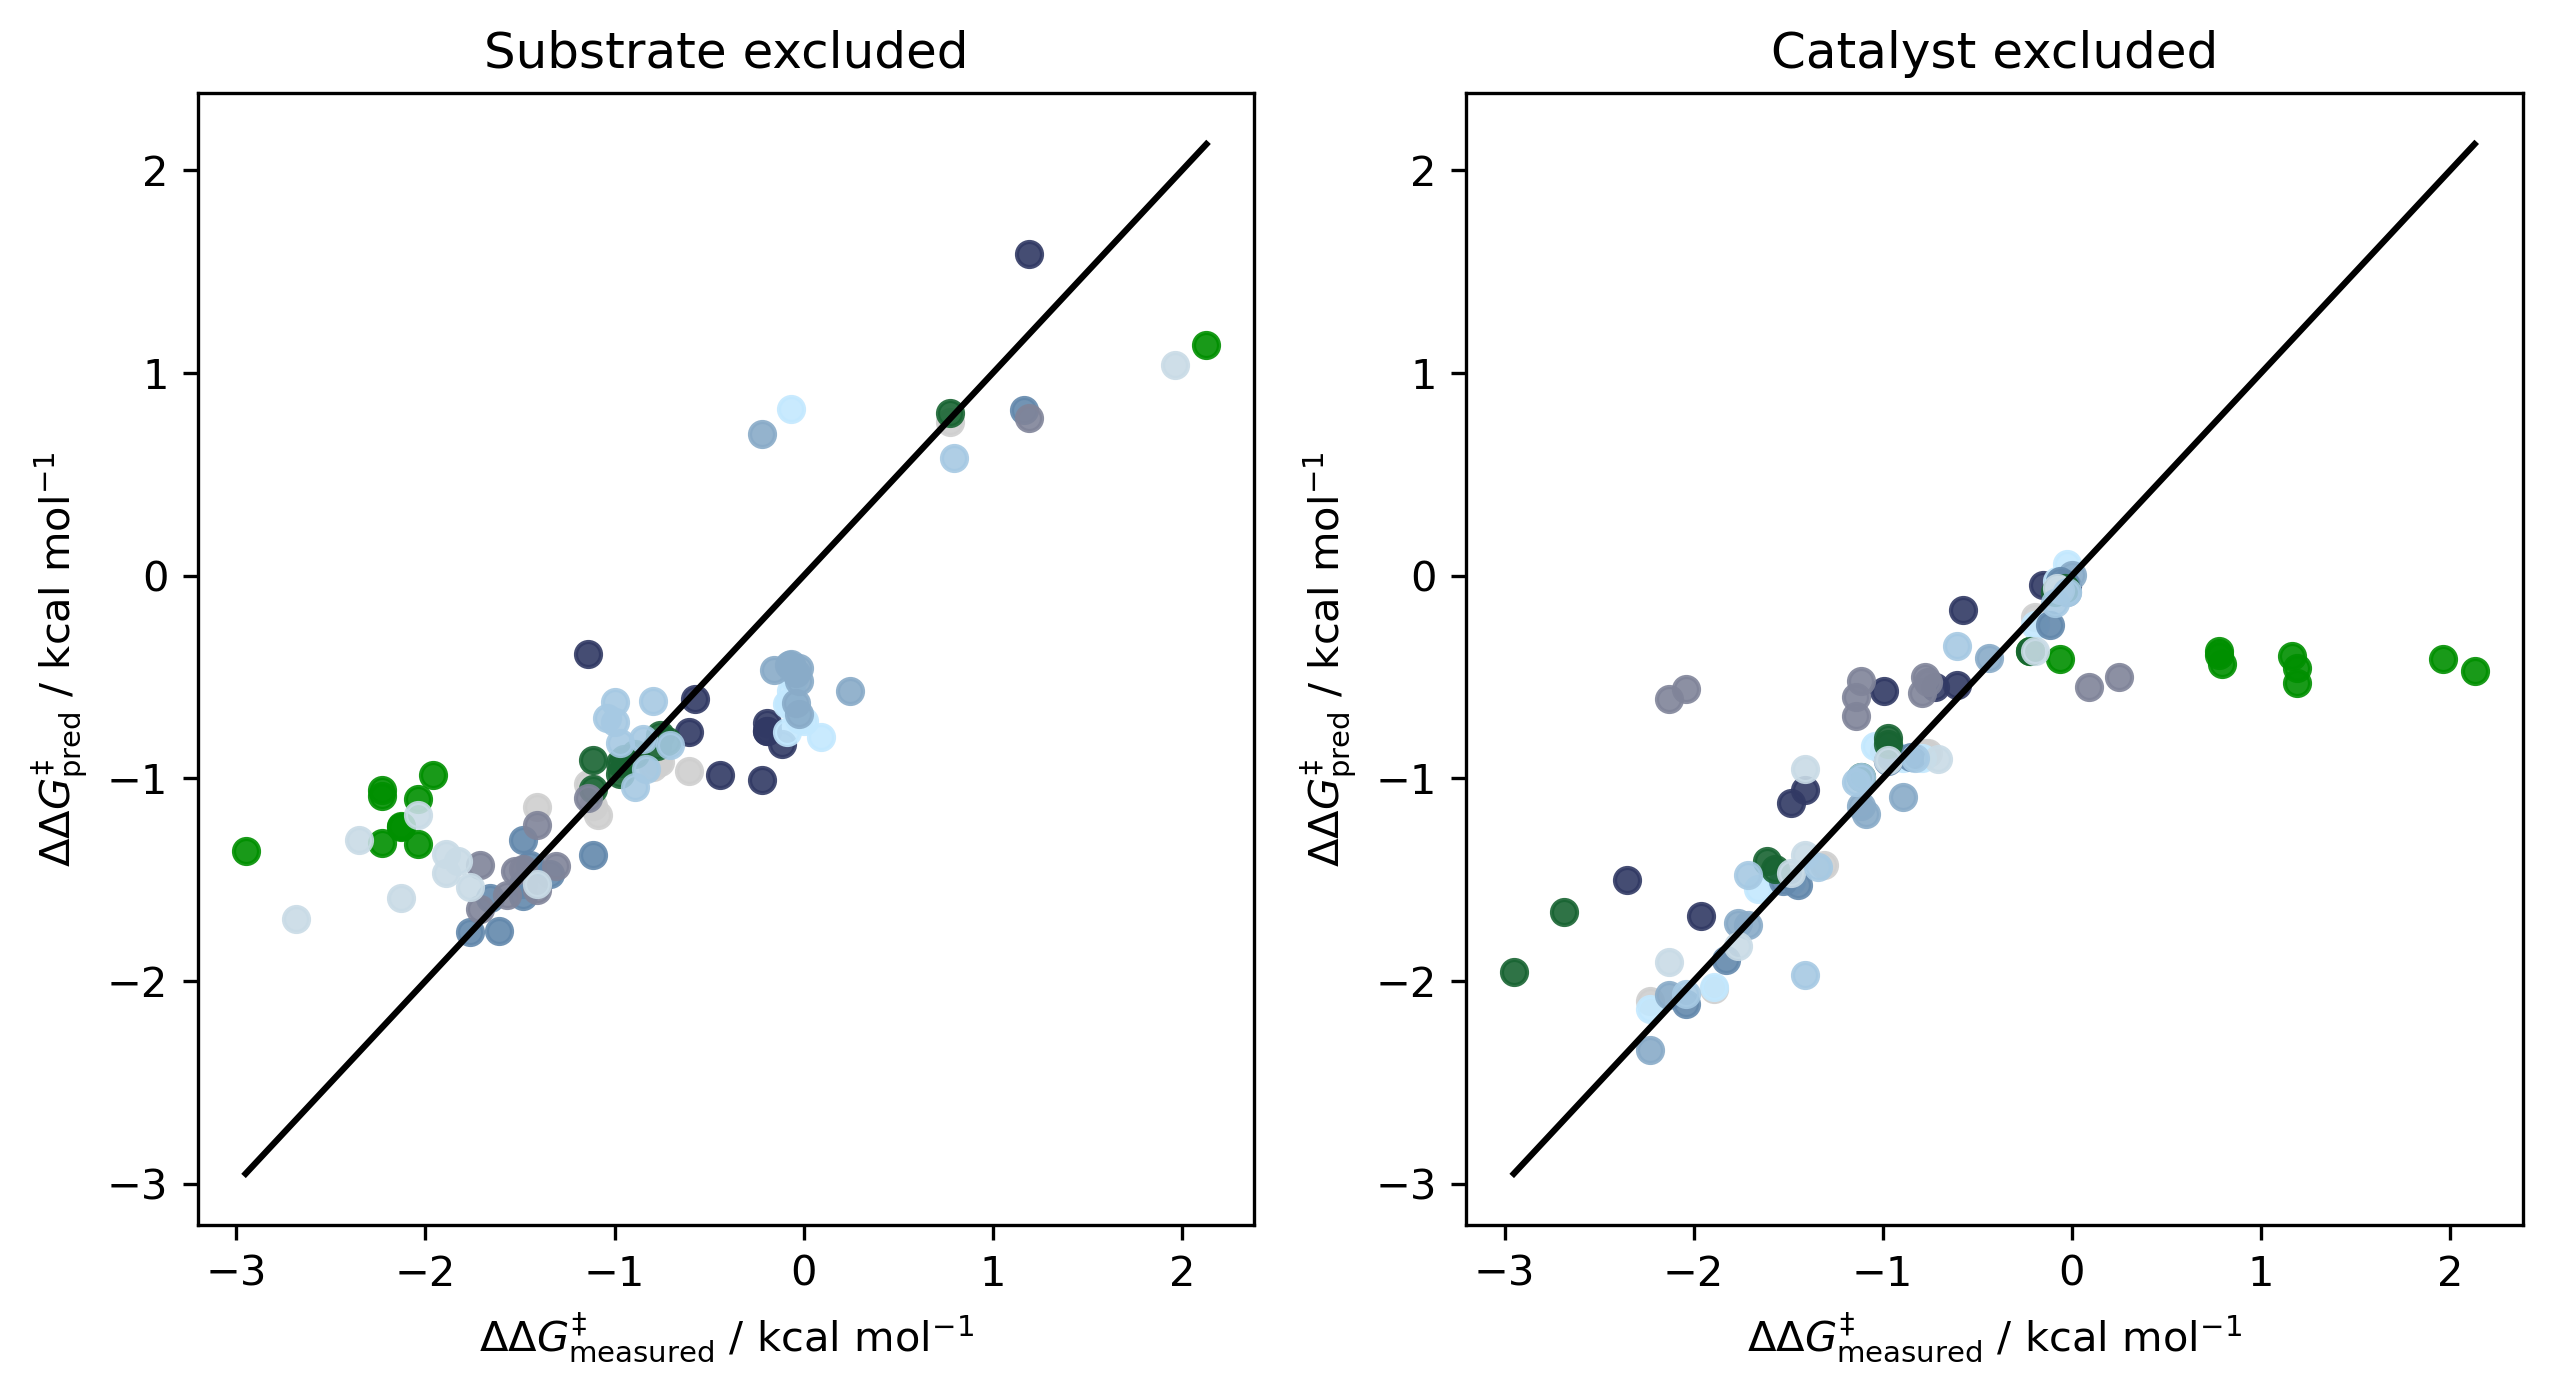

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error

df = pd.read_csv('../Database/CBS_10-04-2023.csv')
# possible entries for r1 in the cbs_df
r1_list = df['r1'].unique()
# possible entries for cat in the cbs_df
cat_list = df['cat'].unique()

# subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=300)

for i, mol in enumerate(['r1', 'cat']):
    val = pd.read_csv(f'cv_models/val_results_2023-11-10_{mol}.csv')

    counter_val = 0

    if mol == 'r1':
        smiles_list = r1_list
    else:
        smiles_list = cat_list

    # Use a colormap from seaborn
    cmap = all_colors_hex

    # Create a color map that maps each unique r1 to a color
    color_map = dict(zip(smiles_list, cmap))

    for smiles in smiles_list:
        
        color = color_map[smiles]
        # how often is r1 in df
        count = len(df[df[mol] == smiles])
        # number of val points is r1_count
        n_val = count
        n_val_index = counter_val + n_val
        mae = mean_absolute_error(val['val_true'][counter_val:n_val_index],val['val_pred'][counter_val:n_val_index])
        axes[i].scatter(val['val_true'][counter_val:n_val_index], val['val_pred'][counter_val:n_val_index],
                    label=f'MAE: {mae:.2f} ' + 'kcal mol$^{-1}$', color=color, alpha=0.9)

        counter_val += n_val

    print(smiles_list)
    axes[i].plot([val['val_true'].min(), val['val_true'].max()], [val['val_true'].min(), val['val_true'].max()], color='#000000', alpha=1)
    axes[i].set_xlabel(r'$\Delta\Delta G^‡_\mathrm{measured}$ / kcal mol$^{-1}$')
    axes[i].set_ylabel(r'$\Delta\Delta G^‡_\mathrm{pred}$ / kcal mol$^{-1}$')

    #axes[i].grid(alpha=0.5)
    #axes[i].legend(loc='best', fontsize=6)
    if mol == 'r1':
        axes[i].set_title('Substrate excluded')
    else:
        axes[i].set_title('Catalyst excluded')

plt.savefig(f'cv_models/cv_plot_cat-subs.png', dpi=300, bbox_inches='tight')
plt.show()
    
